Importing Libraries

In [38]:
import tensorflow as tf # used for train & execute Neural network image recognition
import matplotlib.pyplot as plt # creating static, interactive, and animated visualizations
import pandas as pd #used for working with data sets
import seaborn as sns #data visualization library based on matplotlib

## Data Preprocessing

### Training Image Preprocessing

In [39]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'Riceleafdisease3/train', # data location
    labels="inferred", #labels are generated from the directory structure
    label_mode="categorical",#labels are encoded as a categorical vector
    class_names=None,
    color_mode="rgb",#3 channels in the image tensors
    batch_size=32,
    image_size=(128, 128),# heidht,width
    shuffle=True, #sorts the data in random order & fast
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,


)

Found 14023 files belonging to 9 classes.


## Validation image preprocessing

In [40]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'Riceleafdisease3/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    

)

Found 14023 files belonging to 9 classes.


In [41]:
training_set # to see train data set format

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 9), dtype=tf.float32, name=None))>

In [42]:
for x,y in training_set: # train data set format in more details
    print(x,x.shape)
    print(y,y.shape)
    break

tf.Tensor(
[[[[ 19.21875   50.953125   9.5     ]
   [ 20.25      53.25       8.53125 ]
   [ 20.1875    53.1875     8.28125 ]
   ...
   [255.       255.       255.      ]
   [255.       255.       255.      ]
   [255.       255.       255.      ]]

  [[ 28.921875  61.359375  15.234375]
   [ 31.234375  64.796875  16.109375]
   [ 34.125     67.6875    19.      ]
   ...
   [255.       255.       255.      ]
   [255.       255.       255.      ]
   [255.       255.       255.      ]]

  [[ 41.9375    81.9375    18.9375  ]
   [ 43.921875  83.921875  20.921875]
   [ 41.0625    81.0625    18.0625  ]
   ...
   [255.       255.       255.      ]
   [255.       255.       255.      ]
   [255.       255.       255.      ]]

  ...

  [[ 52.75      85.75      15.25    ]
   [ 54.        92.        17.      ]
   [ 55.75      93.75      18.75    ]
   ...
   [252.       255.       255.      ]
   [252.       255.       255.      ]
   [252.       255.       255.      ]]

  [[ 53.5       86.5       17.5   

## Building Model

In [43]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout # connected NN layer,2D convolution layer,Max pooling operation for 2D spatial data,Flattens the input. Does not affect the batch size,Applies dropout to the input
from tensorflow.keras.models import Sequential # the model is purely a stack of single-input, single-output layers 

In [44]:
model = Sequential()

### Building Convolution Layer

In [45]:
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape= [128,128,3]))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [46]:
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [47]:
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [48]:
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [49]:
model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [50]:
model.add(Dropout(0.25))

In [51]:
model.add(Flatten())

In [52]:
model.add(Dense(units=1500,activation='relu'))

In [53]:
model.add(Dropout(0.4))

#### Output Layer

In [54]:
model.add(Dense(units=9,activation='softmax'))

### Compiling Model

In [55]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [56]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_22 (Conv2D)                   │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_23 (Conv2D)                   │ (None, 126, 126, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_24 (Conv2D)                   │ (None, 63, 63, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_25 (Conv2D)                   │ (None, 61, 61, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_26 (Conv2D)                   │ (None, 30, 30, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_27 (Conv2D)                   │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_28 (Conv2D)                   │ (None, 14, 14, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_29 (Conv2D)                   │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_30 (Conv2D)                   │ (None, 6, 6, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_31 (Conv2D)                   │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1500)                │       3,073,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 1500)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 9)                   │          13,509 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,799,233 (29.75 MB)

 Trainable params: 7,799,233 (29.75 MB)

 Non-trainable params: 0 (0.00 B)

### Model Training

In [57]:
training_history = model.fit(x=training_set,validation_data=validation_set,epochs=10) 

Epoch 1/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 663s 2s/step - accuracy: 0.3734 - loss: 1.7881 - val_accuracy: 0.6934 - val_loss: 0.8165
Epoch 2/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 686s 2s/step - accuracy: 0.7141 - loss: 0.8068 - val_accuracy: 0.8320 - val_loss: 0.4746
Epoch 3/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 752s 2s/step - accuracy: 0.8032 - loss: 0.5672 - val_accuracy: 0.8662 - val_loss: 0.3763
Epoch 4/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 831s 2s/step - accuracy: 0.8478 - loss: 0.4357 - val_accuracy: 0.8997 - val_loss: 0.2801
Epoch 5/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 800s 2s/step - accuracy: 0.8763 - loss: 0.3600 - val_accuracy: 0.9350 - val_loss: 0.2026
Epoch 6/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 644s 1s/step - accuracy: 0.8964 - loss: 0.3010 - val_accuracy: 0.9404 - val_loss: 0.1756
Epoch 7/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 643s 1s/step - accuracy: 0.9253 - loss: 0.2174 - val_accuracy: 0.9519 - val_loss: 0.1309
Epoch 8/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 649s 1s/step - accuracy: 0.9305 - loss: 0.2018 - val_accu

## Model Evaluation 
### Model Evaluation on Training set

In [58]:
train_loss,train_acc = model.evaluate(training_set)

439/439 ━━━━━━━━━━━━━━━━━━━━ 189s 423ms/step - accuracy: 0.9623 - loss: 0.1045


In [59]:
val_loss,val_acc = model.evaluate(validation_set)

439/439 ━━━━━━━━━━━━━━━━━━━━ 186s 416ms/step - accuracy: 0.9673 - loss: 0.0909


### Saving model

In [60]:
model.save("trained_model.keras")

In [61]:
training_history.history

{'accuracy': [0.5284889340400696,
  0.7420666217803955,
  0.8189403414726257,
  0.8604435324668884,
  0.8857591152191162,
  0.9082221984863281,
  0.9344648122787476,
  0.9400984048843384,
  0.95136559009552,
  0.957355797290802],
 'loss': [1.3275325298309326,
  0.7306918501853943,
  0.5209554433822632,
  0.39983880519866943,
  0.3353709876537323,
  0.2659941017627716,
  0.1902584433555603,
  0.17146623134613037,
  0.14147821068763733,
  0.12486056238412857],
 'val_accuracy': [0.6934322118759155,
  0.8319903016090393,
  0.8662197589874268,
  0.8996648192405701,
  0.9349640011787415,
  0.9403836727142334,
  0.9519361257553101,
  0.9525066018104553,
  0.9429508447647095,
  0.9668402075767517],
 'val_loss': [0.816491425037384,
  0.4745940864086151,
  0.376263827085495,
  0.2801201045513153,
  0.20256909728050232,
  0.17563243210315704,
  0.1309051662683487,
  0.1429378241300583,
  0.16113129258155823,
  0.09116851538419724]}

### Record history

In [62]:
import json
with open("training_hist.json","w") as f:
    json.dump(training_history.history,f)

### Accuracy Visualization

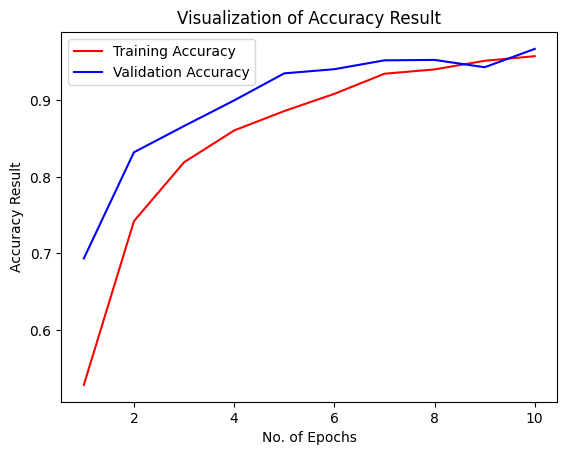

In [63]:
epochs =[i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel("No. of Epochs")
plt.ylabel("Accuracy Result")
plt.title("Visualization of Accuracy Result")
plt.legend()
plt.show()

### some other metrics for model eveluation

In [64]:
class_name= validation_set.class_names
class_name

['bacterial_leaf_blight',
 'brown_spot',
 'healthy',
 'leaf_blast',
 'leaf_scald',
 'narrow_brown_spot',
 'rice_hispa',
 'sheath_blight',
 'tungro']

In [65]:
test_set= tf.keras.utils.image_dataset_from_directory(
    'Riceleafdisease3/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,

)

Found 14023 files belonging to 9 classes.


In [66]:
y_pred = model.predict(test_set)
y_pred,y_pred.shape

439/439 ━━━━━━━━━━━━━━━━━━━━ 131s 299ms/step


(array([[9.9998176e-01, 1.7659562e-05, 2.1378264e-07, ..., 2.6921618e-10,
         4.4914305e-08, 1.0092339e-09],
        [9.9999952e-01, 4.7123913e-07, 9.8177622e-10, ..., 2.0048574e-12,
         1.4648435e-10, 6.2949938e-13],
        [1.0000000e+00, 3.2847280e-18, 3.6896289e-17, ..., 4.7626682e-19,
         9.0733878e-14, 2.3387780e-15],
        ...,
        [7.9799706e-10, 1.3897097e-08, 6.5377090e-09, ..., 3.7993506e-12,
         2.4396019e-07, 9.9998212e-01],
        [1.9121185e-08, 5.4332121e-09, 3.9349690e-08, ..., 7.6165660e-09,
         4.2655279e-09, 9.9999952e-01],
        [6.7977157e-10, 2.1619537e-09, 3.3609080e-08, ..., 2.2579159e-10,
         4.5203027e-08, 9.9999988e-01]], dtype=float32),
 (14023, 9))

In [67]:
predicted_categories=tf.argmax(y_pred,axis=1)

In [68]:
predicted_categories

<tf.Tensor: shape=(14023,), dtype=int64, numpy=array([0, 0, 0, ..., 8, 8, 8], dtype=int64)>

In [69]:
true_categories =tf.concat([y for x,y in test_set],axis=0)
true_categories

<tf.Tensor: shape=(14023, 9), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [70]:
Y_true=tf.argmax(true_categories,axis=1)
Y_true

<tf.Tensor: shape=(14023,), dtype=int64, numpy=array([0, 0, 0, ..., 8, 8, 8], dtype=int64)>

In [71]:
from sklearn.metrics import classification_report,confusion_matrix

In [74]:
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                       precision    recall  f1-score   support

bacterial_leaf_blight       0.99      1.00      0.99      1386
           brown_spot       0.89      0.98      0.93      1480
              healthy       0.99      0.93      0.96      1491
           leaf_blast       0.97      0.91      0.94      1801
           leaf_scald       1.00      0.97      0.99      1670
    narrow_brown_spot       0.93      0.97      0.95      1416
           rice_hispa       0.99      0.98      0.98      1461
        sheath_blight       0.99      0.97      0.98      1578
               tungro       0.97      1.00      0.98      1740

             accuracy                           0.97     14023
            macro avg       0.97      0.97      0.97     14023
         weighted avg       0.97      0.97      0.97     14023



### Confusion Matrix Visualization

In [73]:
cm = confusion_matrix(Y_true,predicted_categories)
cm

array([[1384,    0,    0,    0,    0,    2,    0,    0,    0],
       [   1, 1457,    0,   14,    0,    5,    0,    0,    3],
       [   4,   43, 1385,   34,    0,    1,   14,    1,    9],
       [   2,  101,   13, 1631,    0,   48,    1,    4,    1],
       [   0,    1,    0,    0, 1626,   29,    0,   13,    1],
       [   3,   33,    0,    3,    2, 1371,    0,    1,    3],
       [   5,    1,    1,    0,    0,   14, 1433,    2,    5],
       [   2,    2,    0,    0,    0,    2,    1, 1536,   35],
       [   0,    0,    0,    5,    0,    0,    0,    0, 1735]],
      dtype=int64)

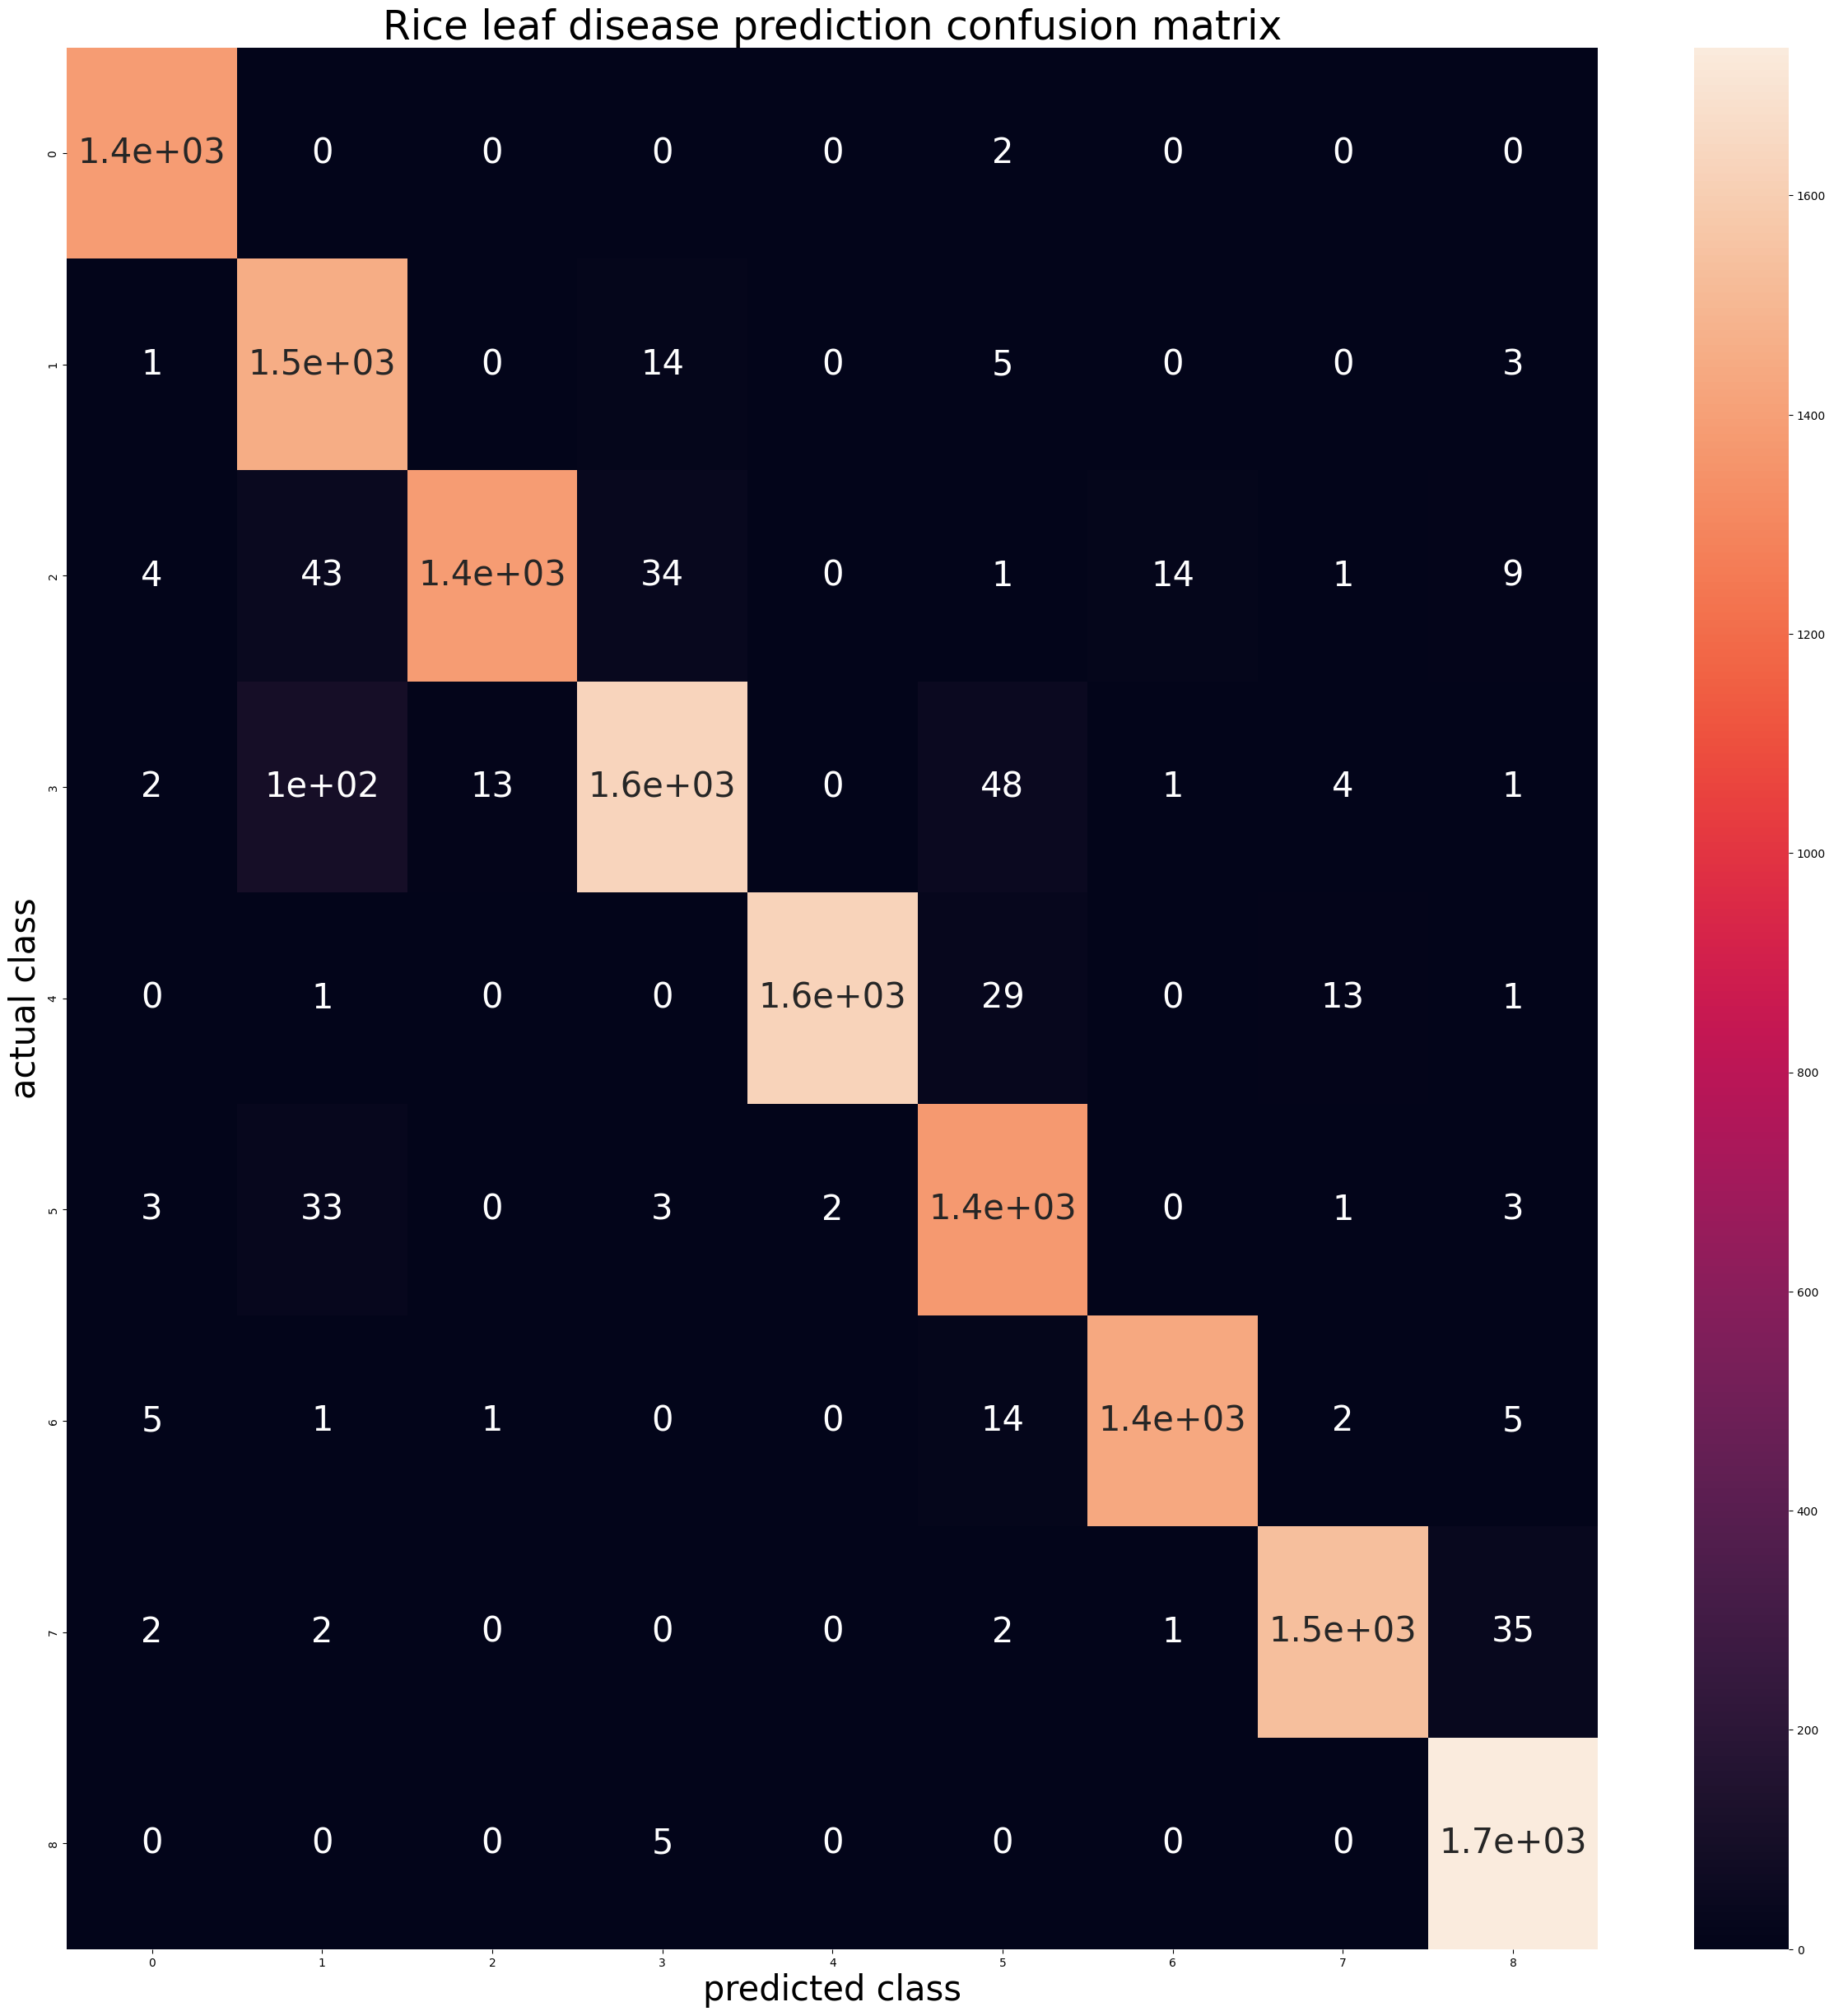

In [75]:
plt.figure(figsize=(30,30))
sns.heatmap(cm,annot=True,annot_kws={'size':30})
plt.xlabel("predicted class",fontsize=30)
plt.ylabel("actual class",fontsize=30)
plt.title("Rice leaf disease prediction confusion matrix",fontsize=35)
plt.show()